<a href="https://colab.research.google.com/github/ti-molodykh/colab/blob/main/%D0%9D%D0%BE%D1%83%D1%82%D0%B1%D1%83%D0%BA_%D0%BA_%D0%B7%D0%B0%D0%BD%D1%8F%D1%82%D0%B8%D1%8E_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Занятие 2

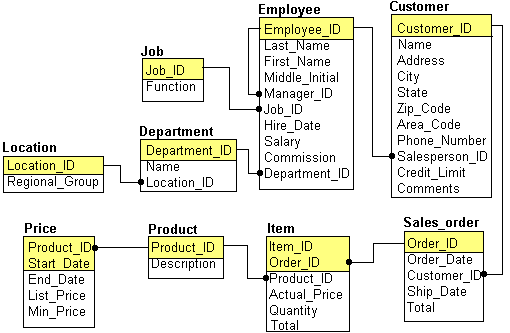

In [ ]:
!pip install psycopg2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import psycopg2
import pandas as pd
import json

DB_HOST = 'de-edu-db.chronosavant.ru'
DB_USER = 'da11'
DB_USER_PASSWORD = 'gandalfthegrey'
DB_NAME = 'edu'

conn = psycopg2.connect(host=DB_HOST, user=DB_USER, password=DB_USER_PASSWORD, dbname=DB_NAME)

In [ ]:
pd.read_sql_query("""
SELECT *
FROM pg_catalog.pg_tables
WHERE schemaname != 'pg_catalog' AND 
    schemaname != 'information_schema'
    """, conn)

,schemaname,tablename,tableowner,tablespace,hasindexes,hasrules,hastriggers,rowsecurity
0,demipt3,ptkn_new_table1,demipt3,None,False,False,False,False
1,de10,rhmv_les6_employees_copy,de10,None,False,False,False,False
2,de10,dmdn_employees,de10,None,False,False,False,False
3,demipt3,kzmn_table2,demipt3,None,False,False,False,False
4,de10,chsn_autos,de10,None,False,False,False,False
...,...,...,...,...,...,...,...,...
819,de10,fzlv_salary_log,de10,None,False,False,False,False
820,de10,mgsh_medicine,de10,None,False,False,False,False
821,de11an,kool_test_table,de11an,None,False,False,False,False
822,de11an,lele_exper,de11an,None,False,False,False,False


### CASE ... WHEN ... END

Выражение CASE в SQL представляет собой общее условное выражение, напоминающее операторы if/else в других языках программирования:

```
CASE WHEN условие THEN *результат*
     [WHEN ...]
     [ELSE *результат*]
END
```


Предложения CASE можно использовать везде, где допускаются выражения. Каждое условие в нём представляет собой выражение, возвращающее *результат* типа boolean. Если *результатом* выражения оказывается true, значением выражения CASE становится *результат*, следующий за условием, а остальная часть выражения CASE не вычисляется. Если же условие не выполняется, за ним таким же образом проверяются все последующие предложения WHEN. Если не выполняется ни одно из условий WHEN, значением CASE становится *результат*, записанный в предложении ELSE. Если при этом предложение ELSE отсутствует, *результатом* выражения будет NULL.

Выбрать имена и зарплаты самого старого и самого молодого сотрудника фирмы. ("Возраст" сотрудника определять по дате его поступления на работу в фирму). Модифицируем этот запрос, обозначим явно самого молодого и самого старого с помощью текста.

In [ ]:
pd.read_sql_query("""
SELECT
    employee_id,
    last_name,
    salary,
    hire_date,
    tminmax.max_hdate,
    tminmax.min_hdate,
    CASE
      WHEN hire_date = tminmax.max_hdate THEN 'youngest'
      WHEN hire_date = tminmax.min_hdate THEN 'oldest'
      ELSE 'regular'
    END AS employee_desc
FROM da.employee, (SELECT MAX(hire_date) AS max_hdate, MIN(hire_date) AS min_hdate FROM da.employee) as tminmax

""", conn)

,employee_id,last_name,salary,hire_date,max_hdate,min_hdate,employee_desc
0,7369,SMITH,800.0,1984-12-17,1987-01-16,1984-12-17,oldest
1,7499,ALLEN,1600.0,1985-02-20,1987-01-16,1984-12-17,regular
2,7505,DOYLE,2850.0,1985-04-04,1987-01-16,1984-12-17,regular
3,7506,DENNIS,2750.0,1985-05-15,1987-01-16,1984-12-17,regular
4,7507,BAKER,2200.0,1985-06-10,1987-01-16,1984-12-17,regular
5,7521,WARD,1250.0,1985-02-22,1987-01-16,1984-12-17,regular
6,7555,PETERS,1250.0,1985-03-31,1987-01-16,1984-12-17,regular
7,7557,SHAW,1250.0,1985-04-02,1987-01-16,1984-12-17,regular
8,7560,DUNCAN,1250.0,1985-05-31,1987-01-16,1984-12-17,regular
9,7564,LANGE,1250.0,1985-06-01,1987-01-16,1984-12-17,regular


CASE WHEN также удобно использовать для подсчета различных показателей, если в одном столбце хранятся несколько разных типов записей. К примеру, у вас может быть колонка "пол", где 0 обозначает мужской пол, а 1 женский. Логика подсчета может отличаться в зависимости от пола. Кроме того, case when позволяет нам естественным образом отнести записи к разным категориям, например, определив интервалы значений в каждой категории.

Ниже посчитаем кол-во записей каждой группы в столбце, выведем результаты для разных категорий в виде колонок, а не строк.

In [ ]:
pd.read_sql_query("""
SELECT 1 as n FROM da.job
  UNION ALL
  SELECT 2 as n FROM da.job WHERE job_id > 670
  UNION ALL
  SELECT 3 as n FROM da.job WHERE job_id < 670
""", conn)

,n
0,1
1,1
2,1
3,1
4,1
5,1
6,2
7,2
8,3
9,3


In [ ]:
pd.read_sql_query("""
SELECT
  SUM(CASE WHEN n = 1 THEN 1 ELSE 0 END) AS "category_1",
  SUM(CASE WHEN n = 2 THEN 1 ELSE 0 END) AS "category_2",
  SUM(CASE WHEN n = 3 THEN 1 ELSE 0 END) AS "category_3"
FROM
  (SELECT 1 as n FROM da.job
  UNION ALL
  SELECT 2 as n FROM da.job WHERE job_id > 670
  UNION ALL
  SELECT 3 as n FROM da.job WHERE job_id < 670) as tbl
""",conn)

,category_1,category_2,category_3
0,6,2,3


In [ ]:
# значения NULL COUNT не посчитает, поэтому можно и вот так
pd.read_sql_query("""
SELECT
  COUNT(CASE WHEN n = 1 THEN n END) AS "category_1",
  COUNT(CASE WHEN n = 2 THEN n END) AS "category_2",
  COUNT(CASE WHEN n = 3 THEN n END) AS "category_3"
FROM
  (SELECT 1 as n FROM da.job
  UNION ALL
  SELECT 2 as n FROM da.job WHERE job_id > 670
  UNION ALL
  SELECT 3 as n FROM da.job WHERE job_id < 670) as tbl
""",conn)

,category_1,category_2,category_3
0,6,2,3


### Создание и изменение таблиц
На примере нескольких типов связей, разберем основные DDL конструкции языка SQL, а также разберем сами особенности связей.

#### Реализация один к одному. Сотрудники и паспорта
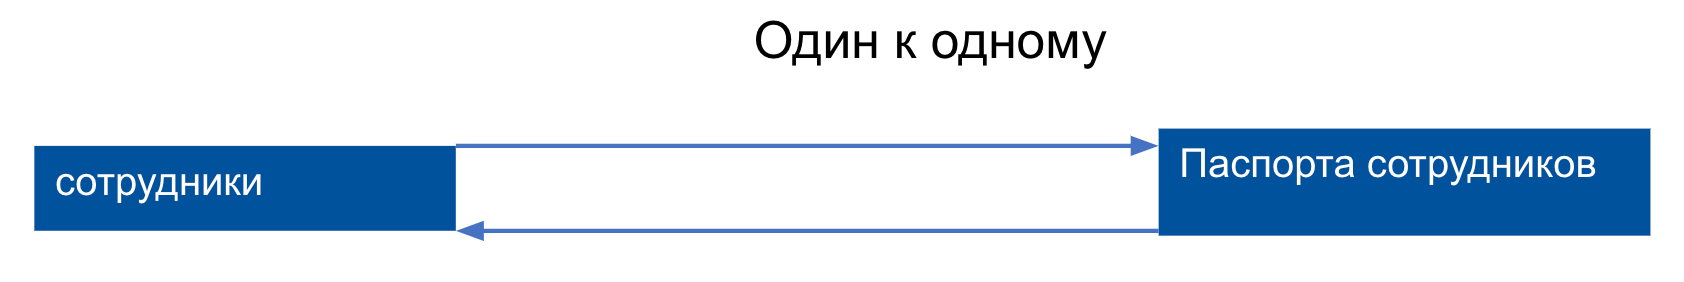

In [ ]:
# скрипт для удаления таблицы на всякий случай
query = "DROP TABLE IF EXISTS da.people"

conn.cursor().execute(query)
conn.commit()

InsufficientPrivilege: ignored

Итак, добавим 3 поля в таблицу people (люди). Ниже, вы можете увидеть, что у колонки id тип данных SERIAL, и она является первичным ключом таблиц, то-есть по этому идентификатору можно восстановить уникальную запись. При этом интересен также и тип данных [SERIAL (см пункт 8.1.4)](https://postgrespro.ru/docs/postgresql/9.6/datatype-numeric). Он предоставляет нам поле целочисленного типа к которому также привязана другая сущность - последовательность чисел. С помощью этой последовательности sql сервер при добавлении новых записей выдает очередной номер. Таким образом, нам не нужно заботиться об уникальности добавляемых нами идентификаторов. При вставке мы можем опустить поле id, и новое значение будет вставлено автоматически. Аналогичная конструкция в СУБД mysql выглядела бы как id INT AUTO_INCREMENT PRIMARY KEY.

Кроме того, обратите внимание, что для реализации связи один к одному, нам необходимо указать, что поле passport должно быть уникальным во всей таблице. Такое ограничение не позволит добавить еще одного человека с таким же номером паспорта.

In [ ]:
query = """
  CREATE TABLE IF NOT EXISTS da.people (
    id SERIAL PRIMARY KEY,
    name VARCHAR(100),
    passport INT UNIQUE
  )
"""
conn.cursor().execute(query)
conn.commit()

InFailedSqlTransaction: ignored

Выполнив запрос ниже, мы можем посмотреть какие таблицы доступны в текущей базе данных

In [ ]:
pd.read_sql_query("""
SELECT *
FROM pg_catalog.pg_tables
WHERE schemaname != 'pg_catalog' AND 
    schemaname != 'information_schema'
    """, conn)

,schemaname,tablename,tableowner,tablespace,hasindexes,hasrules,hastriggers,rowsecurity
0,public,people,student_0,None,True,False,False,False


Внесем новые данные в нашу таблицу, добавим 3 записи о людях. Мы опускаем при вводе поле id, поскольку оно будет заполнено автоматически благодаря тому, что мы указали тип данных SERIAL у этого поля.

Ниже каждый элемент массива это **буквально** тот запрос, который получит sql сервер. Поэтому заметьте, что строковые значения мы берем в кавычки.

In [ ]:
queries = [
  "INSERT INTO people (name, passport) VALUES ('Dmitry', 12345)",
  "INSERT INTO people (name, passport) VALUES ('Alex', 666)",
  "INSERT INTO people (name, passport) VALUES ('Peter', 999)",  
]

for q in queries:
  conn.cursor().execute(q)

conn.commit()

In [ ]:
pd.read_sql_query("select * from da.people", conn)

DatabaseError: ignored

Ниже мы увидим ошибку, так как пытаемся вставить уже существующее в таблице значение в поле passport.

In [ ]:
queries = [
  "INSERT INTO people (name, passport) VALUES ('Vasily', 12345)", 
]

for q in queries:
  conn.cursor().execute(q)

conn.commit()

IntegrityError: ignored

Сейчас транзакция повисла в промежуточном, ошибочном состоянии, наши изменения, которые произошли до выозва conn.commit() на самом деле не применены. Чтобы вернуть наше соединение с базой в нормальное состояние вызовем conn.rollback(). При этом все изменения, которые мы ввели до ошибки будут отменены.

In [ ]:
conn.rollback()

In [ ]:
query = "DROP TABLE IF EXISTS documents"

conn.cursor().execute(query)
conn.commit()

Создадим также таблицу с документами. В ней сделаем поле passport_id первичным ключом. Именно по этому столбцу мы будем соединять таблицы, и для связи один к одному нам нужна уникальность колонки в обеих таблицах. Первичный ключ в таблице documents, по определению ее обеспечивает.

In [ ]:
query = """
  CREATE TABLE IF NOT EXISTS documents (
    passport_id INT PRIMARY KEY,
    birth_date DATE
  )
""" # поле passport_id уникально, также как и поле passport в таблице people
conn.cursor().execute(query)
conn.commit()

In [ ]:
pd.read_sql_query("""
SELECT *
FROM pg_catalog.pg_tables
WHERE schemaname != 'pg_catalog' AND 
    schemaname != 'information_schema'
    """, conn)

,schemaname,tablename,tableowner,tablespace,hasindexes,hasrules,hastriggers,rowsecurity
0,public,people,student_0,None,True,False,False,False
1,public,documents,student_0,None,True,False,False,False


Также добавим данных

In [ ]:
queries = [
  "INSERT INTO documents (passport_id, birth_date) VALUES (12345, '1990-01-01')",
  "INSERT INTO documents (passport_id, birth_date) VALUES (666, '1991-02-01')",
  "INSERT INTO documents (passport_id, birth_date) VALUES (999, '2000-01-01')",  
]

for q in queries:
  conn.cursor().execute(q)

conn.commit()

In [ ]:
pd.read_sql_query("select * from documents", conn)

DatabaseError: ignored

Запрос ниже вызывает ошибку, поскольку мы не можем ввести еще одно значение с существующим номером паспорта.

In [ ]:
queries = [
  "INSERT INTO documents (passport_id, birth_date) VALUES (666, '1992-02-01')",

]

for q in queries:
  conn.cursor().execute(q)

conn.commit()

IntegrityError: ignored

In [ ]:
conn.rollback()

Теперь свяжем наши таблицы с помощью внешнего ключа. Для этого воспользуемся инструкцией ALTER TABLE.

In [ ]:
query = """
ALTER TABLE people ADD FOREIGN KEY (passport) REFERENCES documents(passport_id)  
"""

conn.cursor().execute(query)
conn.commit()

In [ ]:
Попробуем теперь нарушить ограничение: попытаемся добавить шпиона с паспортом, которого не сущесвует

In [ ]:
try:
  query = """
    INSERT INTO people (name, passport) VALUES ('Spy', 11111)
  """

  conn.cursor().execute(query)
  conn.commit()
except Exception as e:
  conn.rollback()
  raise e

IntegrityError: ignored

```
Cannot ad or update a child row: a foreign key constraint fails
```

Т.е. sql сервер говорит нам о том, что ограничение целостности не выполняется. Сначала надо добавить паспорт!

Давайте его добавим:

In [ ]:
query = """
  INSERT INTO documents (passport_id, birth_date) VALUES (11111, '1995-01-01')
"""

conn.cursor().execute(query)
conn.commit()

In [ ]:
pd.read_sql_query("select * from documents",conn)

,passport_id,birth_date
0,12345,1990-01-01
1,666,1991-02-01
2,999,2000-01-01
3,11111,1995-01-01


И теперь попробуем ещё раз добавить этого человека

In [ ]:
query = """
  INSERT INTO people (name, passport) VALUES ('Spy', 11111)
"""

conn.cursor().execute(query)
conn.commit()

На этот раз всё успешно

Кроме того мы не можем просто так удалить строчку из таблицы documents

In [ ]:
query = """
DELETE FROM documents
WHERE passport_id = 11111
"""

conn.cursor().execute(query)
conn.commit()

IntegrityError: ignored

```
Cannot delete or update a parent row: a foreign key contraint fails
```

Поскольку если мы удалим эту строчку, то таблица people станет некорректной, потому что паспорта с таким номером не будет существовать. Такое поведение является поведением по умолчанию, и его можно поменять, например, чтобы при удалении записи на которую ссылаются записи в других таблицах, соответствующее поле в каждой зависимой таблице для этих записей выставлялось в значение NULL.


См. [Отслеживание зависимостей](https://postgrespro.ru/docs/postgresql/9.6/ddl-depend) и [Ограничения: внешние ключи раздел 5.3.5](https://postgrespro.ru/docs/postgrespro/9.5/ddl-constraints)

Подытожим, что нам позволило сделать связь один к одному?
1. Внешние ключи
2. Уникальность поля passport_id в таблице documents
3. Уникальность поля passport в таблице people

Отвеьте себе на вопрос почему каждый из этих пунктов важен для реализации этого типа связи.

#### Реализация связи один ко многим. Кассир и покупатели
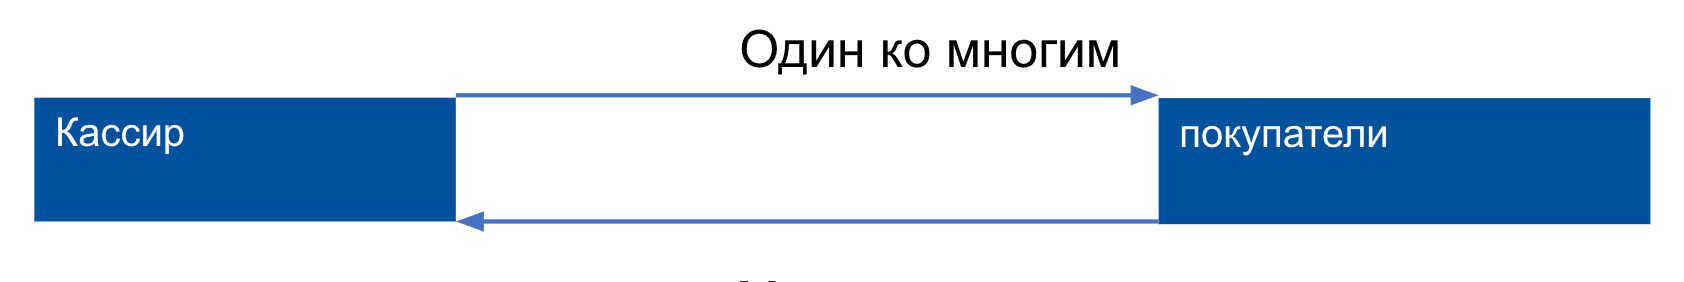

В данном случае мы убираем два последний пункта, позволявших нам сделать связь один к одному, и оставляем просто ограничение внешнего ключа. Так, мы получим связь один ко многим.

Проведем аналогичный процесс создания и заполнения таблиц:

In [ ]:
query = "DROP TABLE IF EXISTS cashier"

conn.cursor().execute(query)
conn.commit()

In [ ]:
query = """
  CREATE TABLE IF NOT EXISTS cashier (
    id SERIAL PRIMARY KEY,
    name VARCHAR(20)
  )
"""
conn.cursor().execute(query)
conn.commit()

In [ ]:
pd.read_sql_query("""
SELECT *
FROM pg_catalog.pg_tables
WHERE schemaname != 'pg_catalog' AND 
    schemaname != 'information_schema'
    """, conn)

,schemaname,tablename,tableowner,tablespace,hasindexes,hasrules,hastriggers,rowsecurity
0,public,documents,student_0,None,True,False,True,False
1,public,people,student_0,None,True,False,True,False
2,public,cashier,student_0,None,True,False,False,False


In [ ]:
query = "DROP TABLE IF EXISTS buyers"

conn.cursor().execute(query)
conn.commit()

In [ ]:
query = """
  CREATE TABLE IF NOT EXISTS buyers (
    id SERIAL PRIMARY KEY,
    name VARCHAR(20)
  )
"""
conn.cursor().execute(query)
conn.commit()

In [ ]:
pd.read_sql_query("""
SELECT *
FROM pg_catalog.pg_tables
WHERE schemaname != 'pg_catalog' AND 
    schemaname != 'information_schema'
    """, conn)

,schemaname,tablename,tableowner,tablespace,hasindexes,hasrules,hastriggers,rowsecurity
0,public,documents,student_0,None,True,False,True,False
1,public,people,student_0,None,True,False,True,False
2,public,cashier,student_0,None,True,False,False,False
3,public,buyers,student_0,None,True,False,False,False


In [ ]:
queries = [
           "INSERT INTO cashier (name) VALUES ('Valentina')",
           "INSERT INTO cashier (name) VALUES ('Anatoly')",
           "INSERT INTO buyers (name) VALUES ('Dmitry')",
           "INSERT INTO buyers (name) VALUES ('Alex')",
]

cursor = conn.cursor()
for q in queries:
  cursor.execute(q)

conn.commit()

In [ ]:
pd.read_sql_query("select * from cashier",conn)

,id,name
0,1,Valentina
1,2,Anatoly


In [ ]:
pd.read_sql_query("select * from buyers", conn)

,id,name
0,1,Dmitry
1,2,Alex


Ой! Кажется мы забыли добавить колонку по который мы будем связывать наши данные. Давайте это исправим с помощью инструкции ALTER TABLE. Добавим в таблицу buyers колонку cashier_id.

In [ ]:
query = """
ALTER TABLE buyers ADD COLUMN cashier_id INT
"""

conn.cursor().execute(query)
conn.commit()

Появилась колонка cashier_id со значением по умолчанию NULL.

In [ ]:
pd.read_sql_query("select * from buyers", conn)

,id,name,cashier_id
0,1,Dmitry,None
1,2,Alex,None


Допустим нам не подходит такой вариант, укажем, что по умолчанию у нас должен быть кассир с идентификатором 1.

Так что удалим эту колонку, снова воспользовавшись инструкцией ALTER TABLE.

In [ ]:
query = """
ALTER TABLE buyers DROP COLUMN cashier_id
"""

conn.cursor().execute(query)
conn.commit()

In [ ]:
pd.read_sql_query("select * from buyers", conn)

,id,name
0,1,Dmitry
1,2,Alex


Верный запрос будет таким:

In [ ]:
query = """
ALTER TABLE buyers ADD COLUMN cashier_id INT DEFAULT 1
"""

conn.cursor().execute(query)
conn.commit()

In [ ]:
pd.read_sql_query("select * from buyers", conn)

,id,name,cashier_id
0,1,Dmitry,1
1,2,Alex,1


А теперь также, как и раньше добавим внешний ключ на свежесозданную колонку.

In [ ]:
query = """
ALTER TABLE buyers ADD FOREIGN KEY (cashier_id) REFERENCES cashier(id)  
"""

conn.cursor().execute(query)
conn.commit()

Попробуем внести в таблицу buyers строчку с несуществующим кассиром

In [ ]:
query ="""
  INSERT INTO buyers (name, cashier_id) VALUES ('Oleg', 50)
"""

conn.cursor().execute(query)
conn.commit()

IntegrityError: ignored

In [ ]:
conn.rollback()

Как видно sql сервер не даёт нам этого сделать

Но при этом мы можем внести запись с существующим кассиром

In [ ]:
 query ="""
  INSERT INTO buyers (name, cashier_id) VALUES ('Oleg', 2)
"""

conn.cursor().execute(query)
conn.commit()

In [ ]:
pd.read_sql_query("select * from buyers",conn)

,id,name,cashier_id
0,1,Dmitry,1
1,2,Alex,1
2,4,Oleg,2


Мы можем совершенно без проблем вносить новых кассиров

In [ ]:
query ="""
  INSERT INTO cashier (name) VALUES ('Alla')
"""

conn.cursor().execute(query)
conn.commit()

In [ ]:
pd.read_sql_query("select * from cashier", conn)

,id,name
0,1,Valentina
1,2,Anatoly
2,3,Alla


Но при этом если есть покупатель, то кассира мы удалить не сможем

In [ ]:
query ="""
  DELETE FROM cashier
  WHERE id = 2
"""

conn.cursor().execute(query)
conn.commit()

IntegrityError: ignored

In [ ]:
conn.rollback()

А если покупателя нет, то сможем

In [ ]:
query ="""
  DELETE FROM cashier
  WHERE id = 3
"""

conn.cursor().execute(query)
conn.commit()

In [ ]:
pd.read_sql_query("select * from cashier", conn)

,id,name
0,1,Valentina
1,2,Anatoly


**Разница со связью один к одному в том, что теперь в колонке со связью (cashier_id) значения могут повторяться!**

А что если мы хотим убрать какое-то ограничение в одной из таблиц?

Тогда нужно выполнить специальный запрос ниже, чтобы увидеть все сущности, связанные с выбранной таблицей.

In [ ]:
pd.read_sql_query("""
SELECT con.*
       FROM pg_catalog.pg_constraint con
            INNER JOIN pg_catalog.pg_class rel
                       ON rel.oid = con.conrelid
            INNER JOIN pg_catalog.pg_namespace nsp
                       ON nsp.oid = connamespace
       WHERE nsp.nspname = 'public'
             AND rel.relname = 'buyers';
""", conn)

,oid,conname,connamespace,contype,condeferrable,condeferred,convalidated,conrelid,contypid,conindid,conparentid,confrelid,confupdtype,confdeltype,confmatchtype,conislocal,coninhcount,connoinherit,conkey,confkey,conpfeqop,conppeqop,conffeqop,conexclop,conbin
0,39722,buyers_pkey,2200,p,False,False,True,39717,0,39721,0,0,,,,True,0,True,[1],None,None,None,None,None,None
1,39724,buyers_cashier_id_fkey,2200,f,False,False,True,39717,0,39705,0,39701,a,a,s,True,0,True,[4],[1],[96],[96],[96],None,None


Здесь мы видим, что у таблицы buyers есть ограничение первичного ключа с названием buyers_pkey, а также ограничение внешнего ключа с названием buyers_cashier_id_fkey.

Теперь, когда мы знаем как называется наше ограничение целостности, мы можем просто его удалить с помощью инструкции изменения таблицы: ALTER TABLE.

In [ ]:
query = """
ALTER TABLE buyers
DROP CONSTRAINT buyers_cashier_id_fkey
"""

#### Реализация многие ко многим. Пример ученики и учителя
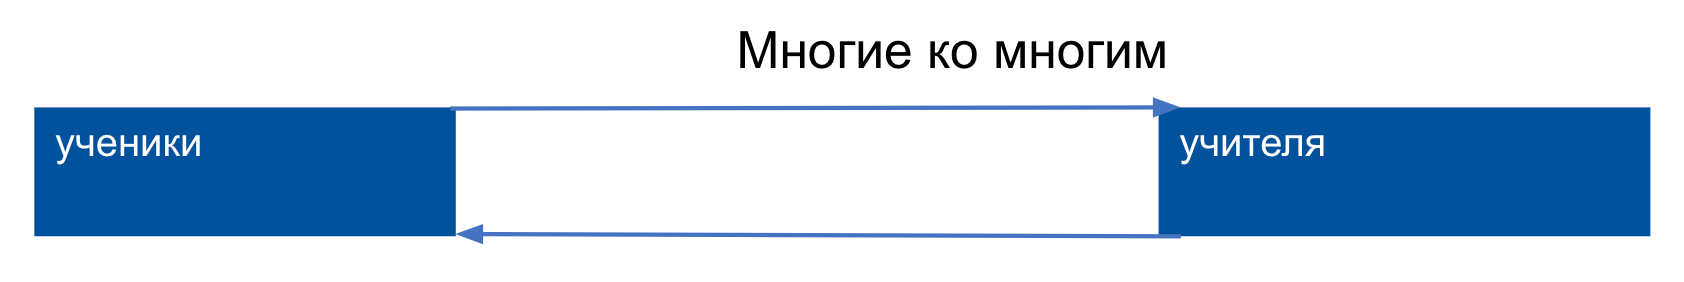

В реляционной базе данных не предусмотрен прямой механизм реализации многие ко многим. Но ее все еще можно реализовать с помощью двух связей: многие-к-одному и один-ко-многим.

Для этого вводится промежуточная таблица, хранящая пары идентификаторов из зависимых таблиц.

In [ ]:
query = "DROP TABLE IF EXISTS student"

conn.cursor().execute(query)
conn.commit()

In [ ]:
query = """
  CREATE TABLE IF NOT EXISTS student (
    id SERIAL PRIMARY KEY,
    name VARCHAR(20)
  )
"""
conn.cursor().execute(query)
conn.commit()

In [ ]:
query = "DROP TABLE IF EXISTS teacher"

conn.cursor().execute(query)
conn.commit()

In [ ]:
query = """
  CREATE TABLE IF NOT EXISTS teacher (
    id SERIAL PRIMARY KEY,
    name VARCHAR(20)
  )
"""
conn.cursor().execute(query)
conn.commit()

In [ ]:
pd.read_sql_query("""
SELECT *
FROM pg_catalog.pg_tables
WHERE schemaname != 'pg_catalog' AND 
    schemaname != 'information_schema'
    """, conn)

,schemaname,tablename,tableowner,tablespace,hasindexes,hasrules,hastriggers,rowsecurity
0,public,documents,student_0,None,True,False,True,False
1,public,people,student_0,None,True,False,True,False
2,public,cashier,student_0,None,True,False,True,False
3,public,buyers,student_0,None,True,False,True,False
4,public,student,student_0,None,True,False,False,False
5,public,teacher,student_0,None,True,False,False,False


In [ ]:
queries = [
           "INSERT INTO teacher (name) VALUES ('Valentina')",
           "INSERT INTO teacher (name) VALUES ('Olga')",
           "INSERT INTO student (name) VALUES ('Dmitry')",
           "INSERT INTO student (name) VALUES ('Anatoly')",
]

for q in queries:
  conn.cursor().execute(q)

conn.commit()

In [ ]:
pd.read_sql_query("select * from teacher", conn)

,id,name
0,1,Valentina
1,2,Olga


In [ ]:
pd.read_sql_query("select * from student", conn)

,id,name
0,1,Dmitry
1,2,Anatoly


Добавим промежуточную таблицу для связи учителей и учеников. Обратите внимание, что уникальность будет отслеживаться по двум полям, то-есть мы сейчас сделаем первичный ключ из двух полей. Создание отдельного суррогатного ключа (отдельной колонки для первичного ключа) также допустимо.

In [ ]:
query = """
  CREATE TABLE IF NOT EXISTS teacher_student (
    teacher_id INT NOT NULL,
    student_id INT NOT NULL,
    PRIMARY KEY (teacher_id, student_id)
  )
"""

conn.cursor().execute(query)
conn.commit()

In [ ]:
pd.read_sql_query("""
SELECT *
FROM pg_catalog.pg_tables
WHERE schemaname != 'pg_catalog' AND 
    schemaname != 'information_schema'
    """, conn)

,schemaname,tablename,tableowner,tablespace,hasindexes,hasrules,hastriggers,rowsecurity
0,public,documents,student_0,None,True,False,True,False
1,public,people,student_0,None,True,False,True,False
2,public,cashier,student_0,None,True,False,True,False
3,public,buyers,student_0,None,True,False,True,False
4,public,student,student_0,None,True,False,False,False
5,public,teacher,student_0,None,True,False,False,False
6,public,teacher_student,student_0,None,True,False,False,False


Добавим внешние ключи

In [ ]:
query = """
ALTER TABLE teacher_student ADD FOREIGN KEY (teacher_id) REFERENCES teacher(id)  
"""

conn.cursor().execute(query)

query = """
ALTER TABLE teacher_student ADD FOREIGN KEY (student_id) REFERENCES student(id)  
"""

conn.cursor().execute(query)

conn.commit()

Теперь мы увидим, что значения могут повторяться как в колонке teacher_id, так и в колонке student_id. То-есть один учитель может быть у многих учеников, и при этом у одного ученика может быть много учителей. Но важно, чтобы не повторялись пары значений (порядок важен), т.е у нас не может быть двух записей (1,2), но могут одновременно присутствовать пары (1,2) и (2,1).

In [ ]:
queries = [
           'INSERT INTO teacher_student (teacher_id, student_id) VALUES (1,2)',
           'INSERT INTO teacher_student (teacher_id, student_id) VALUES (2,1)',
           'INSERT INTO teacher_student (teacher_id, student_id) VALUES (1,1)',
]

for q in queries:
  conn.cursor().execute(q)

conn.commit()

In [ ]:
pd.read_sql_query("select * from teacher_student", conn)

,teacher_id,student_id
0,1,2
1,2,1
2,1,1


Cохраняются ограничения связанный с внешними ключами, что и раньше. Т.е. нельзя добавлять некорректные пары, нельзя удалять отдельные сущности если они присутсвуют в таблице связке. Проверить и убедиться в этом предлагается самостоятельно.

Стоит также обратить внимание на то, что мы не добавляли ограничения сразу при создании таблиц для нашего удобства ввода произвольных данных в эти таблицы. На самом деле, повесить ограничения на колонки можно сразу в запросе [CREATE TABLE](https://postgrespro.ru/docs/postgrespro/9.6/sql-createtable).